# Analisis Decision Tree

### Import Modul

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Import Data

In [2]:
d_cardio = pd.read_excel('cardio_train.xlsx')

print (d_cardio.shape)

(70000, 13)


In [3]:
d_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Mempersiapkan Data Train

In [4]:
d_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


 ### Atribut "id", dihapus

In [5]:
d_cardio.drop(['id'], axis = 1, inplace = True)
d_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
d_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Merubah data negatif menjadi positif

In [8]:
d_cardio = abs(d_cardio)

In [9]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Y = d_cardio.cardio
X = d_cardio
X.drop(['cardio'],axis = 1, inplace = True)

In [11]:
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X,Y,test_size=0.15, random_state=143)
X_train2, X_test2, Y_train2, Y_test2 =train_test_split(X,Y,test_size=0.25, random_state=143)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X,Y,test_size=0.3, random_state=143)


In [12]:
model1 = tree.DecisionTreeClassifier(max_depth = 2)
model2 = tree.DecisionTreeClassifier(max_depth = 2)
model3 = tree.DecisionTreeClassifier(max_depth = 2)


In [13]:
model1.fit(X_train1, Y_train1)
model2.fit(X_train2, Y_train2)
model3.fit(X_train3, Y_train3)


DecisionTreeClassifier(max_depth=2)

In [14]:
y_pred1 = model1.predict(X_test1)
acc1 = accuracy_score(y_pred1,Y_test1)
y_pred2 = model2.predict(X_test2)
acc2 = accuracy_score(y_pred2,Y_test2)
y_pred3 = model3.predict(X_test3)
acc3 = accuracy_score(y_pred3,Y_test3)


In [15]:
print('Untuk ukuran tes dataset 0.15 =' , acc1)
print('Untuk ukuran tes dataset 0.25 =' , acc2)
print('Untuk ukuran tes dataset 0.3 =' , acc3)
print('Untuk max depth = 2')

Untuk ukuran tes dataset 0.15 = 0.7126666666666667
Untuk ukuran tes dataset 0.25 = 0.7141142857142857
Untuk ukuran tes dataset 0.3 = 0.713047619047619
Untuk max depth = 2


Text(0.5, 1.0, 'Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 2)')

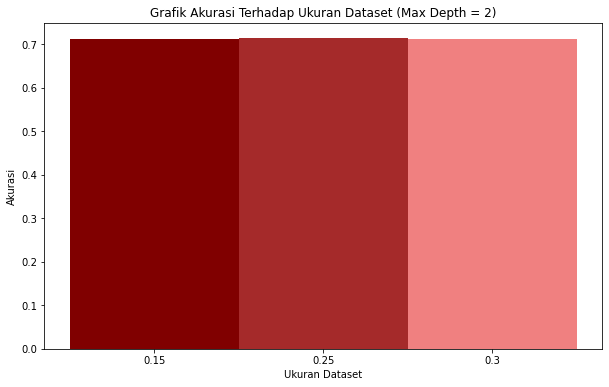

In [35]:
#Grafik Akurasi Terhadap dataset
x=[1,2,3]
y=[acc1, acc2, acc3]
plt.figure(figsize=(10,6))
tick_label = ['0.15','0.25','0.3']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Ukuran Dataset')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 2)')

In [17]:
X_train12, X_test12, Y_train12, Y_test12 =train_test_split(X,Y,test_size=0.15, random_state=143)
X_train22, X_test22, Y_train22, Y_test22 =train_test_split(X,Y,test_size=0.25, random_state=143)
X_train32, X_test32, Y_train32, Y_test32 = train_test_split(X,Y,test_size=0.3, random_state=143)

In [18]:
model12 = tree.DecisionTreeClassifier(max_depth = 3)
model22 = tree.DecisionTreeClassifier(max_depth = 3)
model32 = tree.DecisionTreeClassifier(max_depth = 3)

In [19]:
model12.fit(X_train12, Y_train12)
model22.fit(X_train22, Y_train22)
model32.fit(X_train32, Y_train32)


DecisionTreeClassifier(max_depth=3)

In [20]:
y_pred12 = model12.predict(X_test12)
acc12 = accuracy_score(y_pred12,Y_test12)
y_pred22 = model22.predict(X_test22)
acc22 = accuracy_score(y_pred22,Y_test22)
y_pred32 = model32.predict(X_test32)
acc32 = accuracy_score(y_pred32,Y_test32)

In [21]:
print('Untuk ukuran tes dataset 0.15 =' , acc12)
print('Untuk ukuran tes dataset 0.25 =' , acc22)
print('Untuk ukuran tes dataset 0.3 =' , acc32)
print('Untuk max depth = 3')

Untuk ukuran tes dataset 0.15 = 0.7256190476190476
Untuk ukuran tes dataset 0.25 = 0.7257142857142858
Untuk ukuran tes dataset 0.3 = 0.7258095238095238
Untuk max depth = 3


Text(0.5, 1.0, 'Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 3)')

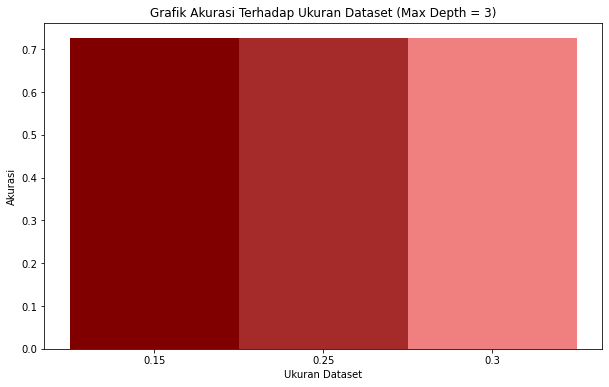

In [22]:
#Grafik Akurasi Terhadap dataset
x=[1,2,3]
y=[acc12, acc22, acc32]
plt.figure(figsize=(10,6))
tick_label = ['0.15','0.25','0.3']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Ukuran Dataset')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 3)')

In [23]:
X_train13, X_test13, Y_train13, Y_test13 =train_test_split(X,Y,test_size=0.15, random_state=143)
X_train23, X_test23, Y_train23, Y_test23 =train_test_split(X,Y,test_size=0.25, random_state=143)
X_train33, X_test33, Y_train33, Y_test33 = train_test_split(X,Y,test_size=0.3, random_state=143)

In [24]:
model13 = tree.DecisionTreeClassifier(max_depth = 5)
model23 = tree.DecisionTreeClassifier(max_depth = 5)
model33 = tree.DecisionTreeClassifier(max_depth = 5)

In [25]:
model13.fit(X_train13, Y_train13)
model23.fit(X_train23, Y_train23)
model33.fit(X_train33, Y_train33)


DecisionTreeClassifier(max_depth=5)

In [26]:
y_pred13 = model13.predict(X_test13)
acc13 = accuracy_score(y_pred13,Y_test13)
y_pred23 = model23.predict(X_test23)
acc23 = accuracy_score(y_pred23,Y_test23)
y_pred33 = model33.predict(X_test33)
acc33 = accuracy_score(y_pred33,Y_test33)

In [27]:
print('Untuk ukuran tes dataset 0.15 =' , acc13)
print('Untuk ukuran tes dataset 0.25 =' , acc23)
print('Untuk ukuran tes dataset 0.3 =' , acc33)
print('Untuk max depth = 5')

Untuk ukuran tes dataset 0.15 = 0.7305714285714285
Untuk ukuran tes dataset 0.25 = 0.7330285714285715
Untuk ukuran tes dataset 0.3 = 0.7316190476190476
Untuk max depth = 5


Text(0.5, 1.0, 'Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 5)')

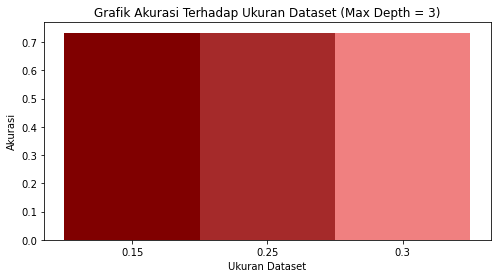

In [28]:
#Grafik Akurasi Terhadap dataset
x=[1,2,3]
y=[acc13, acc23, acc33]
plt.figure(figsize=(8,4))
tick_label = ['0.15','0.25','0.3']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Ukuran Dataset')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Terhadap Ukuran Dataset (Max Depth = 3)')

In [29]:
import statistics
#Rata-rata tiap maxdepth
data2 = [acc1,acc2,acc3]
x1 = statistics.mean(data2)
data3 = [acc12,acc22,acc32]
x2 = statistics.mean(data3)
data5 = [acc13,acc23,acc33]
x3 = statistics.mean(data5)

In [30]:
print(x1)
print(x2)
print(x3)

0.7132761904761905
0.7257142857142858
0.7317396825396826


Text(0.5, 1.0, 'Grafik Rata-Rata Akurasi Terhadap Max Depth')

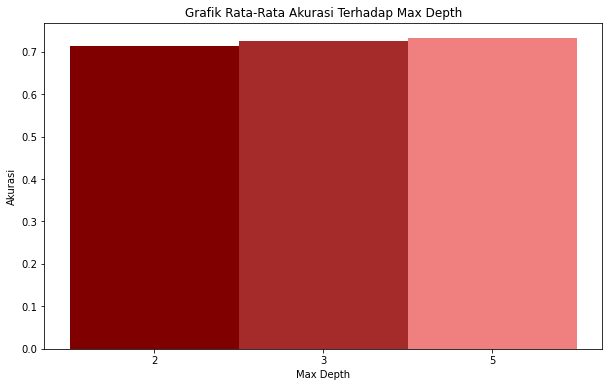

In [31]:
#Grafik Akurasi Terhadap maxdepth
x=[1,2,3]
y=[x1,x2,x3]
plt.figure(figsize=(10,6))
tick_label = ['2','3','5']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Max Depth')
plt.ylabel('Akurasi')
plt.title('Grafik Rata-Rata Akurasi Terhadap Max Depth')

In [32]:
#Rata-rata tiap dataset
dt1 = [acc1,acc12,acc13]
y1 = statistics.mean(dt1)
dt2 = [acc2,acc22,acc23]
y2 = statistics.mean(data3)
dt3 = [acc3,acc32,acc33]
y3 = statistics.mean(data5)

In [33]:
print(y1)
print(y2)
print(y3)

0.7229523809523809
0.7257142857142858
0.7317396825396826


Text(0.5, 1.0, 'Grafik Rata-Rata Akurasi Terhadap Ukuran Dataset')

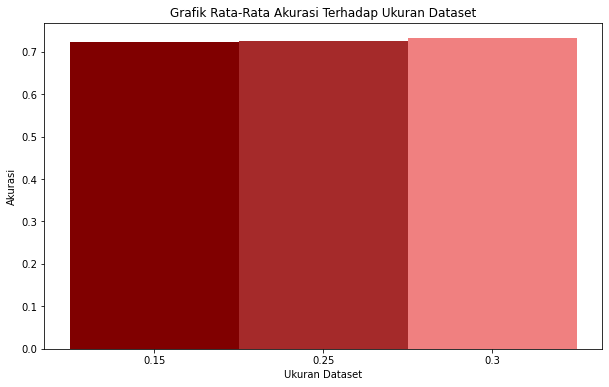

In [34]:
#Grafik Akurasi Terhadap dataset
x=[1,2,3]
y=[y1,y2,y3]
plt.figure(figsize=(10,6))
tick_label = ['0.15','0.25','0.3']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral'])

plt.xlabel('Ukuran Dataset')
plt.ylabel('Akurasi')
plt.title('Grafik Rata-Rata Akurasi Terhadap Ukuran Dataset')

# Terimakasih